In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from uedge import *
from uedge.hdf5 import *
#import plotmesh as pm
from uetools import Case
from uedge.gridue import write_gridue
from Forthon import gchange


In [5]:
c = Case('reconverged_v9_integrated_puff_last_ii2.hdf5')

Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../jupyter/MANTA_final_baseline/reconverged_v9_integrated_puff_last_ii2.hdf5
  User-specified diffusivities read from HDF5 file ".../jupyter/MANTA_final_baseline/reconverged_v9_integrated_puff_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../jupyter/MANTA_final_baseline/reconverged_v9_integrated_puff_last_ii2.hdf5
*** For isimpon=2, set afracs, not afrac ***

*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 2.61e+03



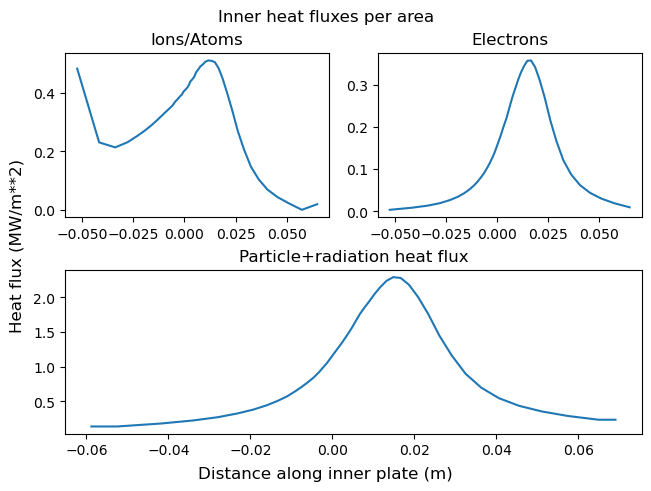

In [6]:
# %matplotlib widget
fig, axs = plt.subplot_mosaic(
    [['TopLeft', 'TopRight'],
     ['Bottom', 'Bottom']],
    layout='constrained',  # Automatically adjust layout
    width_ratios=[1, 1],   # Equal width for the top plots
)
fig.suptitle('Inner heat fluxes per area')
fig.supxlabel('Distance along inner plate (m)')
fig.supylabel('Heat flux (MW/m**2)')
# axs['TopRight'].set_xlabel("Distance along inner plate (m)")
#axs['TopRight'].set_ylabel("feex (W)")
axs['TopRight'].set_title("Electrons")
axs['TopRight'].plot(com.yylb[1:-1],-bbb.feex[0,1:-1]/com.sx[0,1:-1]*1e-6)

# axs['TopLeft'].set_xlabel("Distance along inner plate (m)")
# axs['TopLeft'].set_ylabel("Heat flux (MW/m**2)")
axs['TopLeft'].set_title("Ions/Atoms")
axs['TopLeft'].plot(com.yylb[1:-1],-bbb.feix[0,1:-1]/com.sx[0,1:-1]*1e-6) #polodal east field area

bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)
# axs['Bottom'].set_xlabel("Distance along inner plate (m)")
# axs['Bottom'].set_ylabel("Heat flux [MW/m**2]")
axs['Bottom'].set_title("Particle+radiation heat flux")
axs['Bottom'].plot(com.yylb,1.e-6*(bbb.sdtlb+bbb.sdrlb))
plt.show()

# Generate Grid

In [ ]:
# %matplotlib widget
from gridgen_v9_vertical import setGrid
setGrid()

# Gridmorph

In [ ]:
c.solver.gridmorph("gridue_v9_shaped_open.hdf5", 'gridmorph2', dt=1e20)

In [ ]:
# %%capture capt
import os

directory = os.getcwd()+'/gridmorph'
files = os.listdir(directory)
files.sort(key=lambda x: os.stat(os.path.join(directory, x)).st_mtime)
lpoints = []
rpoints = []
for file in files:
    filename = os.fsdecode(file)
    c = Case('gridmorph/' + filename)
    bbb.fqp=0
    bbb.plateflux(); #internally calculated fluxes (postprocessing)
    ldata = 1.e-6*(bbb.sdtlb+bbb.sdrlb)
    rdata = 1.e-6*(bbb.sdtrb+bbb.sdrrb)
    lpoints.append(max(ldata))
    rpoints.append(max(rdata))
    print(f'Left max: {max(ldata)}, right max: {max(rdata)}', file=sys.stderr)
    
    

In [ ]:
plt.figure()
plt.plot(np.arange(0,18), lpoints)
plt.figure()
plt.plot(np.arange(0,18), rpoints)